**Nombre:** Sarah Valentina Patzi Colodro

**Carrera:** Ingeniería en diseño y animación digital


**Para este laboratorio implementaremos y compararemos modelos de regresión a partir de un dataset que cumpla los requisitos de 10 columnas y 10000 filas**

**Dataset usado:** https://www.kaggle.com/datasets/stealthtechnologies/predict-purity-and-price-of-honey/data

**Nombre del Dataset:** Predict Purity and Price of Honey

**Formato:** 11 Columnas (solo se usaran 10 de las 11 debido a que la columna Pollen_analysis es texto ) 200K+ Filas (se usaran 17000)

**Variables de entrada:**

1.   **CS (Color Score):**
representa la puntuación de color de la muestra de miel, que va de 1,0 a 10,0. Los valores más bajos indican un color más claro, mientras que los valores más altos indican un color más oscuro.

2.   **Density:**
Representa la densidad de la muestra de miel en gramos por centímetro cúbico a 25°C, oscilando entre 1,21 y 1,86.

3. **WC (Water Content):**
Representa el contenido de agua en la muestra de miel, que varía entre 12,0% y 25,0%.

4. **pH:**
Representa el nivel de pH de la muestra de miel, que varía entre 2,50 y 7,50.

5. **EC (Electrical Conductivity):**
Representa la conductividad eléctrica de la muestra de miel en miliSiemens por centímetro.

6. **F (Fructose Level):**
Representa el nivel de fructosa de la muestra de miel, que varía de 20 a 50.

7. **G (Glucose Level):**
Representa el nivel de glucosa de la muestra de miel, que varía entre 20 y 45.

8. **Viscosity:**
Representa la viscosidad de la muestra de miel en centipoise, oscilando entre 1500 y 10000. Los valores de viscosidad entre 2500 y 9500 se consideran óptimos para la pureza.

9. **Purity:**
La variable objetivo representa la pureza de la muestra de miel, que varía entre 0,01 y 1,00.

**Variable de salida Y:**
* **Price (Precio):**
El precio calculado de la miel.

### **Importar Librerias**

**import os:**
Importamos os para manejar archivos y directorios.

**import numpy as np:**
Importamos numpy para operaciones matemáticas y manejo de arreglos.

**from matplotlib import pyplot:**
Importamos pyplot de matplotlib para crear gráficos.

**%matplotlib inline:**
Configuramos para que los gráficos se muestren dentro del cuaderno.

In [466]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot

# Biblioteca para la manipulación y el análisis de datos
import pandas as pd

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


### **Importar carpetas de drive**

In [467]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Regresion Lineal Multivariable**

### Cargar Datos:

Cargamos el dataset de pureza de miel desde un archivo CSV y eliminamos la columna Pollen_analysis porque contiene texto, lo cual no es útil para el análisis de regresión que requiere datos numéricos

In [468]:
# Cargamos el dataset
data = pd.read_csv('/content/gdrive/MyDrive/IA/LaboratoriosOficiales/Lab2-PatziColodroSarahValentina/honey_purity_dataset.csv', delimiter=',')


# Eliminamos la columna 'Pollen_analysis' para que no interfiera en el análisis de regresión al ser texto y no numeros
data = data.drop('Pollen_analysis', axis=1)

#FORMA B: Seleccionamos las primeras 17,000 filas en orden, para poder visualizar de mejor manera las graficas ya que el dataset original cuenta con 247903 datos
#data = data.iloc[:17000]

print(data.shape)

(247903, 10)


In [469]:
data.info() #Muestra informacion si hay valores nulos y el tipo de datos de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CS         247903 non-null  float64
 1   Density    247903 non-null  float64
 2   WC         247903 non-null  float64
 3   pH         247903 non-null  float64
 4   EC         247903 non-null  float64
 5   F          247903 non-null  float64
 6   G          247903 non-null  float64
 7   Viscosity  247903 non-null  float64
 8   Purity     247903 non-null  float64
 9   Price      247903 non-null  float64
dtypes: float64(10)
memory usage: 18.9 MB


### Ajustamos el tamaño de las filas y definimos columnas:

Seleccionamos las primeras 17,000 filas del dataset para facilitar la visualización de gráficos debido al tamaño grande del conjunto de datos original. Luego, separamos los datos en dos partes: "X", que contiene todas las columnas excepto la última (para las características), y "y", que toma solo la última columna (para la variable objetivo). "m" almacena el número de ejemplos (filas) en "y". Imprimimos las primeras 10 filas del DataFrame para verificar que los datos se cargaron correctamente y mostramos el DataFrame completo de manera visualmente formateada para una revisión más fácil.

* **[:17000,]** estás seleccionando desde la fila 0 hasta la fila 16,999

* **[:-1]:** Esto selecciona todas las columnas excepto la última

* **[-1]:** Aquí se selecciona solo la última columna del DataFrame

In [470]:

# FORMA B: Seleccionamos las columnas independientes (X) y dependiente (y)
#X = data.iloc[:, :-1]  # Todas las columnas excepto la última [FILAS, COLUMNAS]
#y = data.iloc[:, -1]   # Solo la última columna [FILAS, COLUMNAS]

# Seleccionamos las primeras 17,000 filas en orden, para poder visualizar de mejor manera las graficas ya que el dataset original cuenta con 247903 datos
# tambien especificamos que para x queremos todas las columnas menos la ultima y para "Y" queremos la ultima
X = data.iloc[:17000, :-1]  #[FILAS, COLUMNAS]
y = data.iloc[:17000, -1]
m = y.size

# Verifica el contenido del array 'data'
print(data.head(10))  # Imprime las primeras 10 filas para asegurarte de que está correcto

print('Número de ejemplos (filas): ', m)

#se utiliza para mostrar un DataFrame de pandas de manera más visual y formateada
display(data)

     CS  Density     WC    pH    EC      F      G  Viscosity  Purity   Price
0  2.81     1.75  23.04  6.29  0.76  39.02  33.63    4844.50    0.68  645.24
1  9.47     1.82  17.50  7.20  0.71  38.15  34.41    6689.02    0.89  385.85
2  4.61     1.84  23.72  7.31  0.80  27.47  34.36    6883.60    0.66  639.64
3  1.77     1.40  16.61  4.01  0.78  31.52  28.15    7167.56    1.00  946.46
4  6.11     1.25  19.63  4.82  0.90  29.65  42.52    5125.44    1.00  432.62
5  2.17     1.35  20.67  4.11  0.75  27.19  43.54    3967.30    0.80  593.55
6  7.15     1.57  13.37  5.79  0.89  43.38  44.94    7384.93    0.95  838.98
7  3.17     1.23  23.35  6.64  0.85  43.50  36.33    5598.87    0.66  639.64
8  4.98     1.73  16.60  6.61  0.74  22.49  44.74    8800.10    0.95  238.05
9  8.49     1.50  15.75  4.50  0.86  49.59  38.13    2675.60    0.82  777.84
Número de ejemplos (filas):  17000


,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,5125.44,1.00,432.62
...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,8261.63,1.00,754.98
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,6939.39,1.00,543.41
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,4139.79,0.64,615.46
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,4417.74,0.97,949.32


### Cargar 100 filas posteriores a las primeras 17000:

Seleccionamos las filas 17,000 a 17,100 para obtener 100 datos adicionales que se usarán posteriormente en las predicciones.
Estos 100 valores están separados de las 17,000 filas iniciales que usamos previamente, proporcionando un subconjunto específico para ajustar probar el modelo.

In [471]:
# Seleccionamos las filas 17,000 a 17,100 para las características y la variable de salida
X_prediccion = data.iloc[17000:17100, :-1]  # Características de las filas adicionales
y_prediccion = data.iloc[17000:17100, -1]   # Variable de salida de las filas adicionales

# Verifica el contenido de las filas adicionales
#print(X_prediccion.head(10))  # Imprime las primeras 10 filas de X_prediccion
#print(y_prediccion.head(10))  # Imprime las primeras 10 filas de y_prediccion

### Verifica si hay valores nulos en X:

In [472]:
print(np.isnan(X).sum())

CS           0
Density      0
WC           0
pH           0
EC           0
F            0
G            0
Viscosity    0
Purity       0
dtype: int64


### **Visualizar de otras formas:**


Imprimimos los nombres de las 9 columnas de características (X) junto con la columna de salida (y) para asegurarnos de que todo esté claro. Luego, usamos un bucle para mostrar los primeros 10 valores de cada columna en X y el valor correspondiente en y. Esto nos ayuda a verificar visualmente los datos y confirmar que las columnas están alineadas correctamente con sus valores.

In [473]:
# Supongamos que tienes 9 columnas en X más la columna y
print('{:>5s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}'.format('X[:,0]','X[:,1]','X[:,2]','X[:,3]','X[:,4]','X[:,5]','X[:,6]','X[:,7]','X[:,8]', 'y')) # Imprime los nombres de las columnas

# Ajusta la cantidad de valores que imprimes dentro del loop para que coincida con la cantidad de columnas en X
for i in range(10):
    print('{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}'.format(
        X.iloc[i, 0], X.iloc[i, 1], X.iloc[i, 2], X.iloc[i, 3], X.iloc[i, 4], X.iloc[i, 5], X.iloc[i, 6], X.iloc[i, 7], X.iloc[i, 8], y.iloc[i]
    ))


X[:,0]         X[:,1]         X[:,2]         X[:,3]         X[:,4]         X[:,5]         X[:,6]         X[:,7]         X[:,8]              y
2.810          1.750          23.040         6.290          0.760          39.020         33.630         4844.500       0.680          645.240        
9.470          1.820          17.500         7.200          0.710          38.150         34.410         6689.020       0.890          385.850        
4.610          1.840          23.720         7.310          0.800          27.470         34.360         6883.600       0.660          639.640        
1.770          1.400          16.610         4.010          0.780          31.520         28.150         7167.560       1.000          946.460        
6.110          1.250          19.630         4.820          0.900          29.650         42.520         5125.440       1.000          432.620        
2.170          1.350          20.670         4.110          0.750          27.190         43.540       

Muestra las primeras 5 filas de X

In [474]:
print(X.head())

     CS  Density     WC    pH    EC      F      G  Viscosity  Purity
0  2.81     1.75  23.04  6.29  0.76  39.02  33.63    4844.50    0.68
1  9.47     1.82  17.50  7.20  0.71  38.15  34.41    6689.02    0.89
2  4.61     1.84  23.72  7.31  0.80  27.47  34.36    6883.60    0.66
3  1.77     1.40  16.61  4.01  0.78  31.52  28.15    7167.56    1.00
4  6.11     1.25  19.63  4.82  0.90  29.65  42.52    5125.44    1.00


### **Normalizar Caracteristicas**
 Este es un paso importante en el preprocesamiento de datos en aprendizaje automático, transformamos las caracteristicas a valores similares para hacer que converjan mas rápido

In [475]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [476]:
# Llama a la funcion featureNormalize con el parametro X para obtener los datos normalizados
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:\n', mu)
print('Desviación estandar calculada:\n', sigma)
print('Datos normalizados:\n',X_norm) # Muestra los datos normalizados


Media calculada:
 CS              5.520009
Density         1.536011
WC             18.505411
pH              4.999626
EC              0.799740
F              35.041062
G              32.548248
Viscosity    5760.697212
Purity          0.825161
dtype: float64
Desviación estandar calculada:
 CS              2.589688
Density         0.187513
WC              3.759361
pH              1.447492
EC              0.057827
F               8.644467
G               7.196022
Viscosity    2461.903897
Purity          0.139553
dtype: float64
Datos normalizados:
              CS   Density        WC        pH        EC         F         G  \
0     -1.046462  1.141196  1.206213  0.891455 -0.687226  0.460287  0.150326   
1      1.525276  1.514504 -0.267442  1.520129 -1.551880  0.359645  0.258720   
2     -0.351397  1.621164  1.387095  1.596122  0.004496 -0.875828  0.251771   
3     -1.448054 -0.725344 -0.504184 -0.683683 -0.341365 -0.407320 -0.611205   
4      0.227823 -1.525290  0.299144 -0.124095  1.73380

Añadimos una columna de unos como primera columna en X, el termino de sesgo es un valor constante que se añade a la ecuación de predicción para ajustar la línea de regresión de manera que se alinee mejor con los datos observados

### **Graficar las caracteristicas:**

Definimos la función graficarDatos para crear gráficos de dispersión con los datos proporcionados. La función toma x y y como los datos para el gráfico, y xlabel y ylabel para las etiquetas de los ejes. Luego, creamos gráficos de dispersión para cada característica normalizada (X_norm) comparada con el precio de la miel (y). Esto nos permite visualizar cómo cada característica se relaciona con el precio de la miel y entender mejor los datos.

* x: Datos que se mostrarán en el eje horizontal (eje x) del gráfico. En este caso, corresponde a una de las características normalizadas de X_norm.

* y: Datos que se mostrarán en el eje vertical (eje y) del gráfico. Aquí, es el precio de la miel.

* xlabel: Etiqueta para el eje horizontal (eje x). Describe qué representa la variable en el eje x, como "CS (Puntuación de color)".

* ylabel: Etiqueta para el eje vertical (eje y). Describe qué representa la variable en el eje y, en este caso, el precio de la miel.

In [477]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

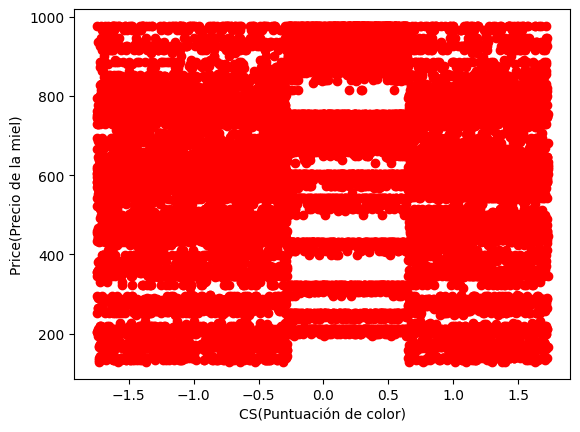

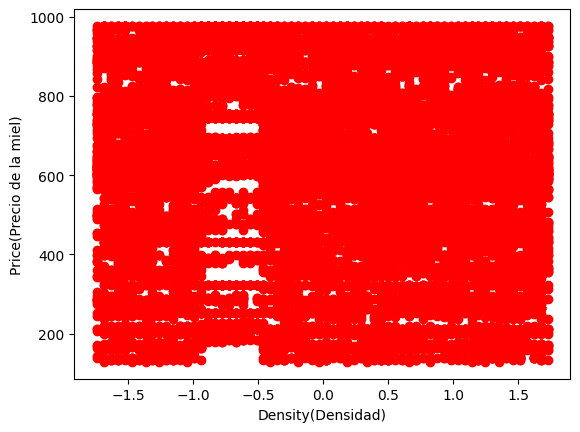

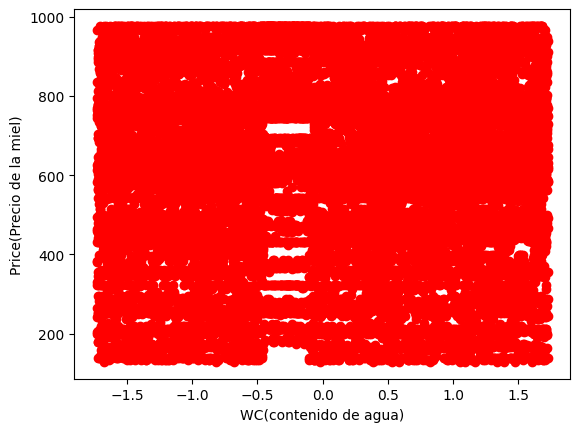

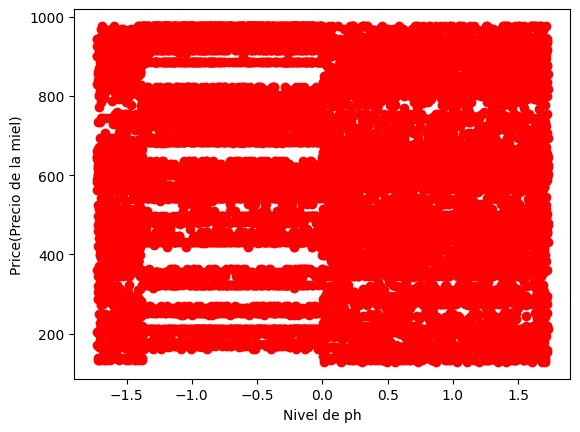

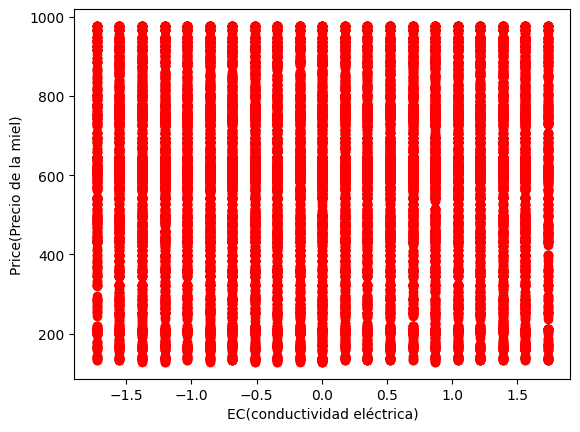

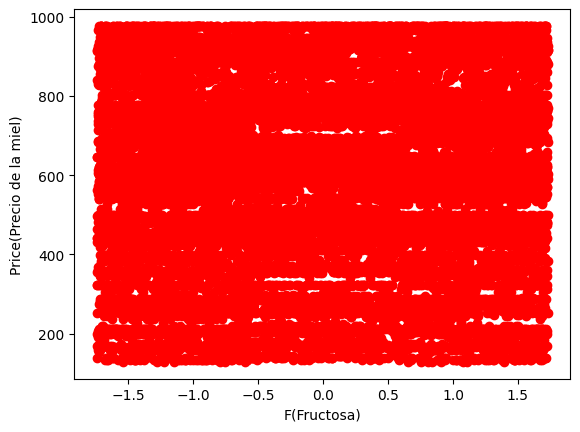

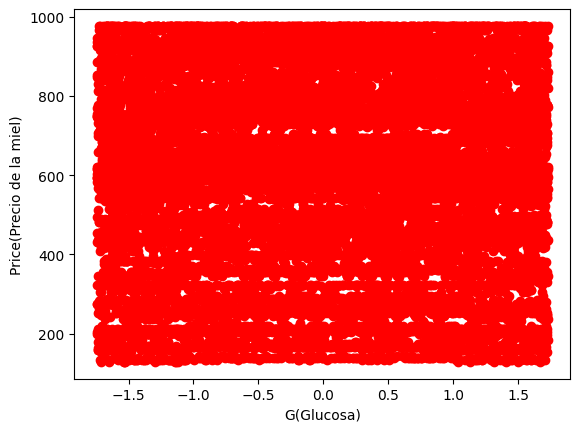

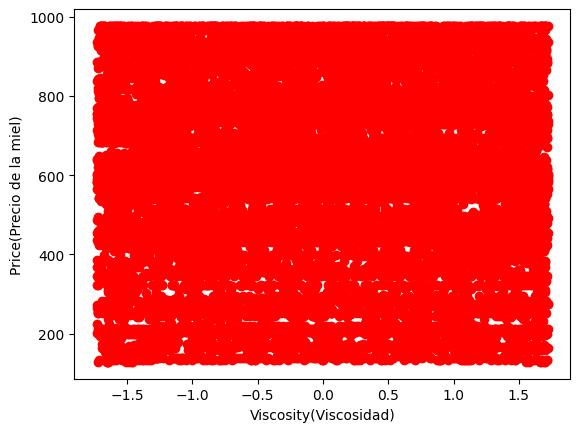

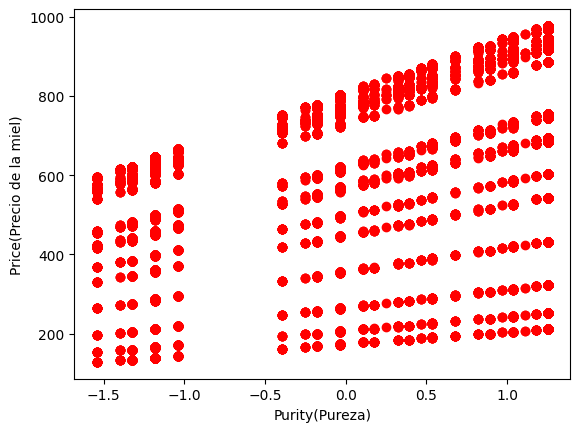

In [478]:
xlabel1 = "CS(Puntuación de color)"
xlabel2 = "Density(Densidad)"
xlabel3 = "WC(contenido de agua)"
xlabel4 = "Nivel de ph"
xlabel5 = "EC(conductividad eléctrica)"
xlabel6 = "F(Fructosa)"
xlabel7 = "G(Glucosa)"
xlabel8 = "Viscosity(Viscosidad)"
xlabel9 = "Purity(Pureza)"
ylabel1 = "Price(Precio de la miel)"
graficarDatos(X_norm['CS'], y, xlabel1, ylabel1)
graficarDatos(X_norm['Density'], y, xlabel2, ylabel1)
graficarDatos(X_norm['WC'], y, xlabel3, ylabel1)
graficarDatos(X_norm['pH'], y, xlabel4, ylabel1)
graficarDatos(X_norm['EC'], y, xlabel5, ylabel1)
graficarDatos(X_norm['F'], y, xlabel6, ylabel1)
graficarDatos(X_norm['G'], y, xlabel7, ylabel1)
graficarDatos(X_norm['Viscosity'], y, xlabel8, ylabel1)
graficarDatos(X_norm['Purity'], y, xlabel9, ylabel1)

### **Se agrega un termino de interseccion:**

Agregamos una columna de 1 a los datos de entrada ya que nos permite representar el término como un parámetro independiente que multiplica a la columna de unos. Esto nos da la flexibilidad de ajustar el modelo para que se ajuste mejor a los datos

In [479]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1) #Añadimos una columna de unos a X

In [480]:
print('Datos normalizados (primeras 10 filas):\n', X_norm[:10])
print('Media calculada:\n', np.mean(X_norm, axis=0))
print('Desviación estándar calculada:\n', np.std(X_norm, axis=0))

Datos normalizados (primeras 10 filas):
          CS   Density        WC        pH        EC         F         G  \
0 -1.046462  1.141196  1.206213  0.891455 -0.687226  0.460287  0.150326   
1  1.525276  1.514504 -0.267442  1.520129 -1.551880  0.359645  0.258720   
2 -0.351397  1.621164  1.387095  1.596122  0.004496 -0.875828  0.251771   
3 -1.448054 -0.725344 -0.504184 -0.683683 -0.341365 -0.407320 -0.611205   
4  0.227823 -1.525290  0.299144 -0.124095  1.733803 -0.623643  1.385731   
5 -1.293596 -0.991992  0.575787 -0.614598 -0.860157 -0.908218  1.527476   
6  0.629416  0.181261 -1.366033  0.546030  1.560872  0.964656  1.722028   
7 -0.907449 -1.631949  1.288674  1.133253  0.869150  0.978538  0.525534   
8 -0.208523  1.034537 -0.506844  1.112527 -1.033088 -1.451919  1.694235   
9  1.146853 -0.192047 -0.732947 -0.345167  1.042080  1.683035  0.775672   

   Viscosity    Purity  
0  -0.372150 -1.040181  
1   0.377075  0.464621  
2   0.456112 -1.183495  
3   0.571453  1.252851  
4  -0.25

### **Cálculo del costo $J(\theta)$:**

Esta funcion calcula el costo, el costo mide la diferencia entre las predicciones realizadas por el modelo y los valores reales observados en los datos.

In [481]:

def computeCostMulti(X, y, theta):
    # almacenamos en m la cantidad de filas que tiene y
    m = y.shape[0]
    # variable que almacenara el valor del costo
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

### **Descenso por el gradiente:**

**Funcion descenso de la gradiente**, ajusta los parametros theta del modelo de regresion de manera que se minimice la funcion de costo

In [482]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0] # almacenamos en m la cantidad de filas que tiene "y"
    theta = theta.copy() # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    J_history = [] # una lista que almacenara el valor de la funcion de costo en cada iteracion
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)

        # Después de actualizar theta, se calcula el costo actual con computeCostMulti y se guarda en J_history.
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

### Seleccionar coheficientes de aprendizaje para hacer la predicción

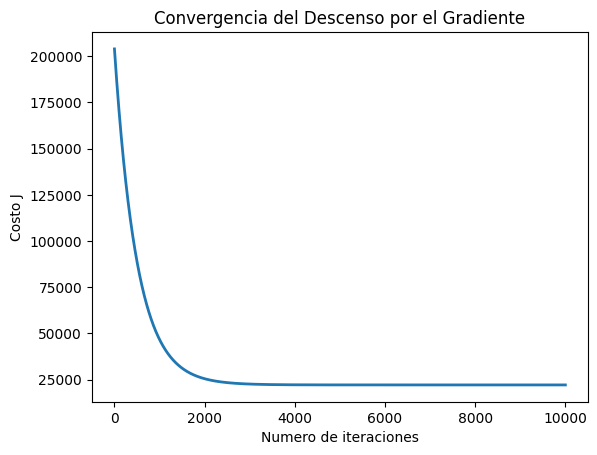

theta calculado por el descenso por el gradiente: [ 5.94878186e+02  1.38705038e+00 -6.58919542e-01  2.79672478e+00
 -3.75268146e-01 -1.77620628e-02 -3.01807580e-01 -9.62465642e-01
 -2.02742164e+00  1.02016689e+02]
Theta encontrada por descenso gradiente: 594.8782, 1.3871
Costo final después de 10000 iteraciones: 22131.90


In [483]:
# Elegir algun valor para alpha
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente:
#theta[0] es el peso asociado con la columna de unos (el sesgo). theta[1] a theta[9] son los pesos asociados con las 9 características de entrada.

theta = np.zeros(10) # son solo las 9 columnas de X más 1 que aumentamos de unos (sesgo)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Descenso por el Gradiente')
pyplot.show()

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print(f"Costo final después de {num_iters} iteraciones: {J_history[-1]:.2f}")


## **PREDICCIONES DE LA REGRESION LINEAL MULTIVARIABLE**


 **Calculamos la Y predicha**

Multiplicamos las caracteristicas con la theta y este proceso nos da una estimación de la variable de salida

In [484]:
# Estimar el precio de la miel:
#CS(Puntuación de color)	Density(Densidad)	WC(contenido de agua)	pH	EC(conductividad eléctrica)	F(Fructosa)	G(Glucosa)	Viscosity(Viscosidad)	Purity(Pureza)
X_array = [1,2.81,1.75,23.04,6.29,0.76,39.02,33.63,4844.5,0.68] #El primer valor 1 corresponde a la columna de unos que añadimos previamente a X

# Normalizar las características (excepto la columna de unos): X_array[1:10] excluye el primer elemento (X_array[0], que es el sesgo) y toma los siguientes 9 elementos,
#que corresponden a las 9 características de entrada.
X_array[1:10] = (X_array[1:10] - mu) / sigma

Precio = np.dot(X_array, theta) #645.24

print('El precio predecido de la miel es: ${:.2f}'.format(Precio))


El precio predecido de la miel es: $490.08


### **100 Predicciones**

Realizo 100 predicciones con los 100 datos establecidos previamente en las variables **X_prediccion** y **y_prediccion**

In [485]:
# Normaliza las características de las filas adicionales
X_prediccion_normalized = (X_prediccion - mu) / sigma

# Añadir el sesgo (columna de unos) a las características normalizadas
X_prediccion_normalized = np.hstack([np.ones((X_prediccion_normalized.shape[0], 1)), X_prediccion_normalized])

# Realiza las predicciones
predicciones = np.dot(X_prediccion_normalized, theta)

# Imprime las predicciones junto con el valor real
for i, (prediccion, real) in enumerate(zip(predicciones, y_prediccion), start=1):
    print(f"Predicción {i}: ${prediccion:.0f} - Valor Real: ${real:.0f}")

Predicción 1: $721 - Valor Real: $755
Predicción 2: $589 - Valor Real: $563
Predicción 3: $463 - Valor Real: $622
Predicción 4: $690 - Valor Real: $877
Predicción 5: $595 - Valor Real: $753
Predicción 6: $464 - Valor Real: $345
Predicción 7: $579 - Valor Real: $778
Predicción 8: $632 - Valor Real: $471
Predicción 9: $482 - Valor Real: $211
Predicción 10: $721 - Valor Real: $886
Predicción 11: $684 - Valor Real: $885
Predicción 12: $721 - Valor Real: $919
Predicción 13: $473 - Valor Real: $286
Predicción 14: $607 - Valor Real: $822
Predicción 15: $723 - Valor Real: $543
Predicción 16: $466 - Valor Real: $204
Predicción 17: $470 - Valor Real: $586
Predicción 18: $466 - Valor Real: $500
Predicción 19: $635 - Valor Real: $185
Predicción 20: $722 - Valor Real: $916
Predicción 21: $717 - Valor Real: $939
Predicción 22: $472 - Valor Real: $140
Predicción 23: $476 - Valor Real: $626
Predicción 24: $725 - Valor Real: $251
Predicción 25: $722 - Valor Real: $886
Predicción 26: $473 - Valor Real: 

# **Ecuacion de la normal**


### **Importar Librerias**

In [486]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

### **Cargar Datos:**
Cargamos el dataset de pureza de miel desde un archivo CSV y eliminamos la columna Pollen_analysis porque contiene texto, lo cual no es útil para el análisis de regresión que requiere datos numéricos

In [487]:
# Cargamos el dataset
data = pd.read_csv('/content/gdrive/MyDrive/IA/LaboratoriosOficiales/Lab2-PatziColodroSarahValentina/honey_purity_dataset.csv', delimiter=',')


# Eliminamos la columna 'Pollen_analysis' para que no interfiera en el análisis de regresión al ser texto y no numeros
data = data.drop('Pollen_analysis', axis=1)

# Seleccionamos las primeras 17,000 filas en orden, para poder visualizar de mejor manera las graficas ya que el dataset original cuenta con 247903 datos
data = data.iloc[:17000]

print(data.shape)

(17000, 10)


Seleccionamos las columnas del DataFrame data para crear nuestras variables de características y salida. X contiene todas las columnas excepto la última (las características independientes), y y toma solo la última columna (la variable dependiente). Calculamos el número de ejemplos (filas) en y con y.size. Luego, imprimimos las primeras 10 filas de data para verificar que los datos se cargaron correctamente y usamos display(data) para mostrar el DataFrame de manera más visual y formateada.

In [488]:
# Seleccionamos las columnas independientes (X) y dependiente (y)
X = data.iloc[:, :-1]  # Todas las columnas excepto la última
y = data.iloc[:, -1]   # Solo la última columna
m = y.size

# Verifica el contenido del array 'data'
print(data.head(10))  # Imprime las primeras 10 filas para asegurarte de que está correcto

print('Número de ejemplos (filas): ', m)

#se utiliza para mostrar un DataFrame de pandas de manera más visual y formateada
display(data)

     CS  Density     WC    pH    EC      F      G  Viscosity  Purity   Price
0  2.81     1.75  23.04  6.29  0.76  39.02  33.63    4844.50    0.68  645.24
1  9.47     1.82  17.50  7.20  0.71  38.15  34.41    6689.02    0.89  385.85
2  4.61     1.84  23.72  7.31  0.80  27.47  34.36    6883.60    0.66  639.64
3  1.77     1.40  16.61  4.01  0.78  31.52  28.15    7167.56    1.00  946.46
4  6.11     1.25  19.63  4.82  0.90  29.65  42.52    5125.44    1.00  432.62
5  2.17     1.35  20.67  4.11  0.75  27.19  43.54    3967.30    0.80  593.55
6  7.15     1.57  13.37  5.79  0.89  43.38  44.94    7384.93    0.95  838.98
7  3.17     1.23  23.35  6.64  0.85  43.50  36.33    5598.87    0.66  639.64
8  4.98     1.73  16.60  6.61  0.74  22.49  44.74    8800.10    0.95  238.05
9  8.49     1.50  15.75  4.50  0.86  49.59  38.13    2675.60    0.82  777.84
Número de ejemplos (filas):  17000


,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,5125.44,1.00,432.62
...,...,...,...,...,...,...,...,...,...,...
16995,9.57,1.29,23.97,7.38,0.79,28.15,33.67,6868.14,0.66,492.92
16996,4.95,1.55,24.68,5.97,0.71,26.54,33.47,2701.55,0.97,244.34
16997,9.97,1.64,21.80,7.27,0.80,41.17,23.02,9889.01,0.61,595.49
16998,7.10,1.51,13.58,3.62,0.86,30.06,20.83,3477.05,1.00,976.69


In [489]:
print(X.head()) # Muestra las primeras 5 filas de X

     CS  Density     WC    pH    EC      F      G  Viscosity  Purity
0  2.81     1.75  23.04  6.29  0.76  39.02  33.63    4844.50    0.68
1  9.47     1.82  17.50  7.20  0.71  38.15  34.41    6689.02    0.89
2  4.61     1.84  23.72  7.31  0.80  27.47  34.36    6883.60    0.66
3  1.77     1.40  16.61  4.01  0.78  31.52  28.15    7167.56    1.00
4  6.11     1.25  19.63  4.82  0.90  29.65  42.52    5125.44    1.00


### **Añadimos una columna de unos**
esta línea de código añade una columna de unos a X para incluir un término de sesgo en el modelo de regresión lineal. Este término de sesgo es necesario para calcular la intersección en la ecuación de la recta de regresión.

In [490]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

### **Agregamos la funcion de la ecuación de la normal:**

In [491]:
# Funcion de la ecuacion de la normal, obtenemos valores optimos
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

### **Hacemos el calculo de theta haciendo uso de la ecuación de la Normal:**

In [492]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados obtenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))
X_array = [1,2.81,1.75,23.04,6.29,0.76,39.02,33.63,4844.5,0.68]
price = np.dot(X_array, theta)

print('Precio de miel (usando la ecuación de la normal): ${:.3f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [-8.18647241e+00  5.31750762e-01 -3.44359323e+00  7.45175943e-01
 -2.38301836e-01 -3.24201502e-01 -3.47569499e-02 -1.33501382e-01
 -8.24695406e-04  7.31276501e+02]
Precio de miel (usando la ecuación de la normal): $490.132


### Prediccion inicial:

In [493]:
# Prediccion 1 ecuacion de la normal
X_array = [1,3.17, 1.60, 20.08, 7.00, 0.60, 30.78, 30.39, 4763.3, 0.70]
price = np.dot(X_array, theta)

print('Precio predecido : ${:.2f}'.format(price))

Precio predecido : $503.93


### **100 Predicciones de Ejemplo Ecuación de la Normal**

En este código, estamos generando ejemplos aleatorios para probar cómo cambia el precio de la miel basado en una ecuación de regresión.
* for i in range(100):
Ejecuta el bucle 100 veces para generar 100 ejemplos.

* X_array = np.random.rand(10) * np.random.randint(1, 2, size=10)
Crea un arreglo X_array de 10 números aleatorios. Cada número se genera multiplicando un valor aleatorio entre 0 y 1 por un número entero aleatorio (1 o 2).

* print("Ejemplo", i+1, ":", X_array)
Imprime el índice del ejemplo actual y el arreglo X_array generado.

* estado = np.dot(X_array, theta)
Calcula el precio de la miel usando la ecuación de la regresión lineal, donde theta es el vector de parámetros del modelo. La función np.dot realiza el producto punto entre X_array y theta.

* print('Precio de miel (usando la ecuación de la normal): {:.3f}'.format(estado))
Imprime el precio de la miel calculado con formato de 3 decimales.

In [494]:
for i in range(100):
    X_array = np.random.rand(10) * np.random.randint(1, 2, size=10)
    print("Ejemplo", i+1, ":", X_array)
    estado = np.dot(X_array, theta)
    print('Precio de miel (usando la ecuación de la normal): {:.3f}'.format(estado))


Ejemplo 1 : [0.31095994 0.94306604 0.42930954 0.62404257 0.84169611 0.31571825
 0.18609202 0.00657022 0.51784707 0.10972416]
Precio de miel (usando la ecuación de la normal): 76.870
Ejemplo 2 : [0.9449395  0.67853264 0.364979   0.29965329 0.35920297 0.15058808
 0.93977676 0.36074304 0.95327604 0.58638458]
Precio de miel (usando la ecuación de la normal): 420.185
Ejemplo 3 : [0.44023893 0.3230654  0.81413306 0.29086579 0.90638229 0.08598472
 0.37020175 0.77407555 0.60649647 0.01946178]
Precio de miel (usando la ecuación de la normal): 7.852
Ejemplo 4 : [0.64074557 0.45516585 0.39149163 0.30660432 0.52879208 0.14833844
 0.32130825 0.35498606 0.81792972 0.45636893]
Precio de miel (usando la ecuación de la normal): 327.375
Ejemplo 5 : [0.87889163 0.21932323 0.18440384 0.69407242 0.11274957 0.43452056
 0.04909227 0.1923993  0.5734083  0.58195251]
Precio de miel (usando la ecuación de la normal): 418.176
Ejemplo 6 : [0.80219626 0.10372083 0.27324142 0.86966229 0.54201104 0.62649663
 0.846151

# **REGRESION POLINOMICA**

### **Importar carpetas de drive**

In [495]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Importar Librerias**

In [496]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

### Cargar Datos:

In [497]:
# Cargamos el dataset
data = pd.read_csv('/content/gdrive/MyDrive/IA/LaboratoriosOficiales/Lab2-PatziColodroSarahValentina/honey_purity_dataset.csv', delimiter=',')


# Eliminamos la columna 'Pollen_analysis' para que no interfiera en el análisis de regresión al ser texto y no numeros
data = data.drop('Pollen_analysis', axis=1)

#FORMA B: Seleccionamos las primeras 17,000 filas en orden, para poder visualizar de mejor manera las graficas ya que el dataset original cuenta con 247903 datos
#data = data.iloc[:17000]

print(data.shape)

(247903, 10)


### Ajustamos el tamaño de las filas y definimos columnas:

In [498]:

# Seleccionamos las primeras 17,000 filas en orden, para poder visualizar de mejor manera las graficas ya que el dataset original cuenta con 247903 datos
# tambien especificamos que para x queremos todas las columnas menos la ultima y para "Y" queremos la ultima
X = data.iloc[:17000, :-1]  #[FILAS, COLUMNAS]
y = data.iloc[:17000, -1]
m = y.size

# Verifica el contenido del array 'data'
print(data.head(10))  # Imprime las primeras 10 filas para asegurarte de que está correcto

print('Número de ejemplos (filas): ', m)

#se utiliza para mostrar un DataFrame de pandas de manera más visual y formateada
display(data)

     CS  Density     WC    pH    EC      F      G  Viscosity  Purity   Price
0  2.81     1.75  23.04  6.29  0.76  39.02  33.63    4844.50    0.68  645.24
1  9.47     1.82  17.50  7.20  0.71  38.15  34.41    6689.02    0.89  385.85
2  4.61     1.84  23.72  7.31  0.80  27.47  34.36    6883.60    0.66  639.64
3  1.77     1.40  16.61  4.01  0.78  31.52  28.15    7167.56    1.00  946.46
4  6.11     1.25  19.63  4.82  0.90  29.65  42.52    5125.44    1.00  432.62
5  2.17     1.35  20.67  4.11  0.75  27.19  43.54    3967.30    0.80  593.55
6  7.15     1.57  13.37  5.79  0.89  43.38  44.94    7384.93    0.95  838.98
7  3.17     1.23  23.35  6.64  0.85  43.50  36.33    5598.87    0.66  639.64
8  4.98     1.73  16.60  6.61  0.74  22.49  44.74    8800.10    0.95  238.05
9  8.49     1.50  15.75  4.50  0.86  49.59  38.13    2675.60    0.82  777.84
Número de ejemplos (filas):  17000


,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,5125.44,1.00,432.62
...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,8261.63,1.00,754.98
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,6939.39,1.00,543.41
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,4139.79,0.64,615.46
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,4417.74,0.97,949.32


### **Cargar 100 filas posteriores a las primeras 17000:**

In [499]:
# Seleccionamos las filas 17,000 a 17,100 para las características y la variable de salida
X_prediccion = data.iloc[17000:17100, :-1]  # Características de las filas adicionales
y_prediccion = data.iloc[17000:17100, -1]   # Variable de salida de las filas adicionales

In [500]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Precio')
    pyplot.xlabel('Caracteristica')


### **Expansión de Características en Regresión Polinómica:**

Añade una nueva característica al conjunto de datos X para hacer una regresión polinómica. La línea X = np.concatenate([X, X * X], axis=1) toma la matriz X y la amplía añadiendo una nueva columna que es el cuadrado de cada valor en X

In [501]:
X = np.concatenate([X, X * X], axis=1)
print(X)

[[2.81000000e+00 1.75000000e+00 2.30400000e+01 ... 1.13097690e+03
  2.34691802e+07 4.62400000e-01]
 [9.47000000e+00 1.82000000e+00 1.75000000e+01 ... 1.18404810e+03
  4.47429886e+07 7.92100000e-01]
 [4.61000000e+00 1.84000000e+00 2.37200000e+01 ... 1.18060960e+03
  4.73839490e+07 4.35600000e-01]
 ...
 [9.97000000e+00 1.64000000e+00 2.18000000e+01 ... 5.29920400e+02
  9.77925188e+07 3.72100000e-01]
 [7.10000000e+00 1.51000000e+00 1.35800000e+01 ... 4.33888900e+02
  1.20898767e+07 1.00000000e+00]
 [1.47000000e+00 1.32000000e+00 1.51400000e+01 ... 6.49740100e+02
  7.40360435e+07 4.35600000e-01]]


### **Normalización de Características:**

La función featureNormalize ajusta las características de X para que tengan una media de 0 y una desviación estándar de 1. Calcula la media y desviación estándar de cada columna, luego ajusta los valores de X restando la media y dividiendo por la desviación estándar. Devuelve el conjunto de datos normalizado, junto con las medias y desviaciones estándar usadas.

In [502]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [503]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)
print(X_norm)

[[-1.04646161  1.14119643  1.20621288 ...  0.0421273  -0.54753652
  -1.03811624]
 [ 1.52527644  1.51450447 -0.2674419  ...  0.15501131  0.19074546
   0.40019099]
 [-0.35139727  1.62116392  1.38709469 ...  0.14769752  0.28239681
  -1.1550305 ]
 ...
 [ 1.71834987  0.55456949  0.87636957 ... -1.23633756  2.0317657
  -1.43204751]
 [ 0.6101084  -0.13871688 -1.31017236 ... -1.44059939 -0.94244158
   1.30714905]
 [-1.5638984  -1.15198158 -0.89520819 ... -0.98147753  1.20732575
  -1.1550305 ]]


### **Añade un Término de Sesgo:**

Este código agrega una columna de unos al inicio del conjunto de datos X_norm para incluir un término de sesgo en el modelo

In [504]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -1.04646161  1.14119643 ...  0.0421273  -0.54753652
  -1.03811624]
 [ 1.          1.52527644  1.51450447 ...  0.15501131  0.19074546
   0.40019099]
 [ 1.         -0.35139727  1.62116392 ...  0.14769752  0.28239681
  -1.1550305 ]
 ...
 [ 1.          1.71834987  0.55456949 ... -1.23633756  2.0317657
  -1.43204751]
 [ 1.          0.6101084  -0.13871688 ... -1.44059939 -0.94244158
   1.30714905]
 [ 1.         -1.5638984  -1.15198158 ... -0.98147753  1.20732575
  -1.1550305 ]]


### **DESCENSO POR EL GRADIENTE:**

### **Calculo de costo:**

La función computeCostMulti calcula el costo del modelo de regresión multivariable comparando las predicciones con los valores reales. Usa la fórmula del error cuadrático medio para medir qué tan bien se ajusta el modelo.

In [505]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

### **Descenso por el gradiente:**

La función gradientDescentMulti ajusta los parámetros del modelo theta para minimizar el costo usando el descenso por el gradiente. Actualiza theta iterativamente, calculando el gradiente y restándolo de theta. Guarda el costo en cada iteración para rastrear el progreso. Finalmente, devuelve los parámetros ajustados y la historia del costo.

In [506]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

### **Configuración y Ejecución del Descenso por el Gradiente:**

Se establece una tasa de aprendizaje alpha y el número de iteraciones. Se inicializan los parámetros theta y se ejecuta el descenso por el gradiente con gradientDescentMulti. Luego, se grafica la evolución del costo a lo largo de las iteraciones y se muestra el valor final de theta.

theta calculado por el descenso por el gradiente: [ 5.94878186e+02  2.01200655e+00 -3.38646161e-01  1.36854119e+00
 -1.07521760e+00  1.49197213e-01 -2.35814753e+00  7.24485703e-01
 -1.84705665e+00  5.17209642e+01 -6.80822611e-01 -2.66026528e-01
  1.45791131e+00  2.81729075e-01 -2.09352033e-01  2.31857522e+00
 -1.75890863e+00 -6.44454696e-02  5.01919649e+01]


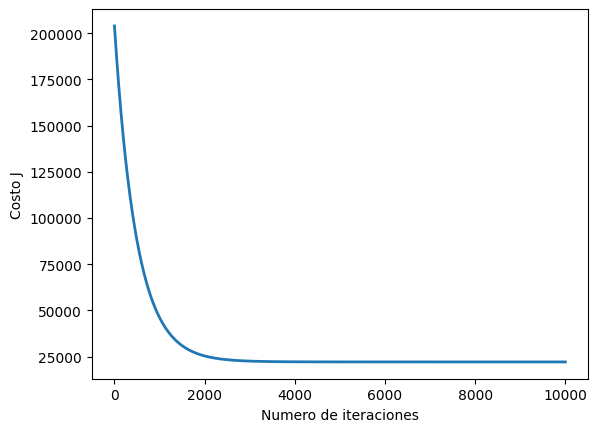

In [507]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(19) # son solo las 9 columnas (9*2 =18) de X más 1 que aumentamos de unos (sesgo)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


## **PREDICCIONES**

Primero, se normalizan las características de X_array (excepto el primer valor de sesgo) usando mu y sigma. Luego, se usa el modelo theta para calcular el precio estimado a partir de X_array mediante la multiplicación de matrices. Finalmente, se imprimen el valor de theta encontrado, el costo final después de las iteraciones y el precio estimado.

In [508]:
X_array = [1, 2.81, 1.75, 23.04, 6.29, 0.76, 39.02, 33.63, 4844.5, 0.68,
          7.8961, 3.0625, 531.3024, 39.5641, 0.5776, 1521.3604, 1123.5969, 23458700.25, 0.4624] #las primeras 9 características después del 1 son las originales, y las 9 características adicionales al final son sus cuadrados
X_array[1:19] = (X_array[1:19] - mu) / sigma
price = np.dot(X_array, theta)

print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print(f"Costo final después de {num_iters} iteraciones: {J_history[-1]:.2f}")

print('El precio (usando el descenso por el gradiente): ${:.0f}'.format(price))

Theta encontrada por descenso gradiente: 594.8782, 2.0120
Costo final después de 10000 iteraciones: 22134.40
El precio (usando el descenso por el gradiente): $490


### 100 predicciones

Primero, se toma X_prediccion, que son las características de las filas 17,000 a 17,100 del dataset, y se les añaden términos cuadrados para capturar relaciones no lineales. Luego, se normalizan estos datos usando las medias (mu) y desviaciones estándar (sigma) calculadas en los datos de entrenamiento. Se agrega una columna de unos para incluir el término de sesgo, generando X_prediccion_nor_ses. Usando el modelo theta, se calculan las predicciones (predicciones_RegPol). Finalmente, se imprimen estas predicciones junto con los valores reales esperados (y_prediccion) para comparar y evaluar el rendimiento del modelo.

In [509]:
# Agregar términos al cuadrado
X_prediccion_Cuadrado = np.concatenate([X_prediccion, X_prediccion ** 2], axis=1)

# Normalización de los datos de prueba usando mu y sigma calculados en los datos de entrenamiento
X_prediccion_Cuadrado_norm = (X_prediccion_Cuadrado - mu) / sigma

# Agregar la columna de unos a los datos normalizados
X_prediccion_nor_ses = np.concatenate([np.ones((X_prediccion_Cuadrado_norm.shape[0], 1)), X_prediccion_Cuadrado_norm], axis=1)

# Realizar las predicciones
predicciones_RegPol = np.dot(X_prediccion_nor_ses, theta)

# Imprimir las predicciones junto con los valores reales
for i, (prediccion, real) in enumerate(zip(predicciones_RegPol, y_prediccion)):
    print(f'Predicción {i+1}: ${prediccion:.0f} - Valor Esperado: ${real:.0f}')


Predicción 1: $722 - Valor Esperado: $755
Predicción 2: $585 - Valor Esperado: $563
Predicción 3: $465 - Valor Esperado: $622
Predicción 4: $690 - Valor Esperado: $877
Predicción 5: $592 - Valor Esperado: $753
Predicción 6: $467 - Valor Esperado: $345
Predicción 7: $575 - Valor Esperado: $778
Predicción 8: $627 - Valor Esperado: $471
Predicción 9: $483 - Valor Esperado: $211
Predicción 10: $724 - Valor Esperado: $886
Predicción 11: $682 - Valor Esperado: $885
Predicción 12: $724 - Valor Esperado: $919
Predicción 13: $476 - Valor Esperado: $286
Predicción 14: $603 - Valor Esperado: $822
Predicción 15: $726 - Valor Esperado: $543
Predicción 16: $468 - Valor Esperado: $204
Predicción 17: $474 - Valor Esperado: $586
Predicción 18: $468 - Valor Esperado: $500
Predicción 19: $632 - Valor Esperado: $185
Predicción 20: $724 - Valor Esperado: $916
Predicción 21: $718 - Valor Esperado: $939
Predicción 22: $474 - Valor Esperado: $140
Predicción 23: $477 - Valor Esperado: $626
Predicción 24: $728 